In [88]:
import random
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import math
import sys

In [89]:
interestRate = 0.2
# Some initial interest rate must be set, otherwise the trial would not work. 
maxWithdrawals = 70
# The maximum number of people (out of 100) who may withdraw their money without the bank has to close.
numTrials = 100
# The total number of simulations made; during each of them the bank either close or not.

In [90]:
def runTrial(interestRate,maxWithdrawals,initialInvestment):
        numWithdrawals = 0
        # The initial number of withdrawals is 0. 
        # It increases by 1 with each person who decides during any round to withdraw.
        withdrawParameter = 0
        # This parameter increases with every withdrawal. 
        # Higher the parameter is, higher is the current risk aversion of every person.
        peopleList = []
        for i in range(0,100):
            peopleList.append([random.normalvariate(.5,.5/3),0,i])
            # The People List contains personal data of every person out of 100.
            # [0] The first number is a random risk parameter with mean=0.5 and SD=(0.5/3).
            # [1] The second one determines whether the person has already decided to withdraw (1) or not (0).
            # [2] At the third position is "i" - a number in range 0-99 which serves as a personal ID.
        for roundNum in range (0,3):
        # There are 3 rounds of each simulation, in the Diamond & Dybvig paper described as periods T=0,1,2.
            if numWithdrawals < maxWithdrawals:
            # A condition necessary for each round; if not satisfied the bank has already closed.
                for person in peopleList:
                    if numWithdrawals < maxWithdrawals:
                        if not person[1] == 1:
                        # Check if this person has still her investment in bank (has not withdrawn in previous rounds).
                            num = random.random()
                            # Return a random number in range [0.0, 1.0).
                            currentRiskAversionParam = person[0]+withdrawParameter-interestRate
                            # This parameter is different for each person because of the random risk parameter.
                            # It also varies between rounds as the withdraw parameter may change.
                            if num < currentRiskAversionParam:
                            # Then this person withdraws.
                                numWithdrawals = numWithdrawals + 1
                                person[1]=1
                                # Ensure this person may not participate in following rounds.
                                withdrawParameter = numWithdrawals/100
                                # So that the parameter is permanently higher for every following person and round.
        if numWithdrawals < maxWithdrawals:
            return 0
        else:
            return 1
        # This loop runs after the whole trial (3 rounds with 100 persons).
        # The trial counts for 1 in case that the bank had to close during it.

In [82]:
x = []
y = []
for inc in range(0,100,1):
        interestRate = float(inc)/100
        # The interest rate gradually increases from 0.00 to 0.99.
        closeSum = 0
        for i in range(0,numTrials):
            closeSum = closeSum + runTrial(interestRate,maxWithdrawals,initialInvestment)
            # This variable sums the total number of trials when the bank had to close.
        fractionClose = float(closeSum)/numTrials
        x.append(interestRate)
        y.append(fractionClose)
        # Both the interest rate and the fraction of closed banks are added to lists representing x and y axis.

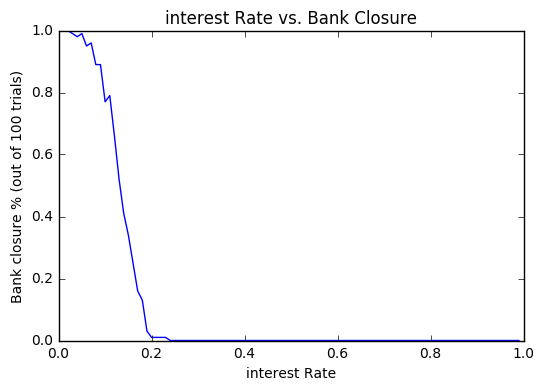

In [83]:
plt.plot(x,y)
plt.xlabel("interest Rate")
plt.ylabel("Bank closure % (out of 100 trials)")
plt.title("interest Rate vs. Bank Closure")
plt.show()

In [100]:
x = []
y = []
for inc in range(0,100,1):
        interestRate = 0.2
        # The interest rate is now fixed again.
        maxWithdrawals = inc
        # The maximum number of withdrawals gradually icreases from 0 to 99.
        closeSum = 0
        for i in range(0,numTrials):
            closeSum = closeSum + runTrial(interestRate,maxWithdrawals,initialInvestment)
        fractionClose = float(closeSum)/numTrials
        x.append(maxWithdrawals)
        y.append(fractionClose)

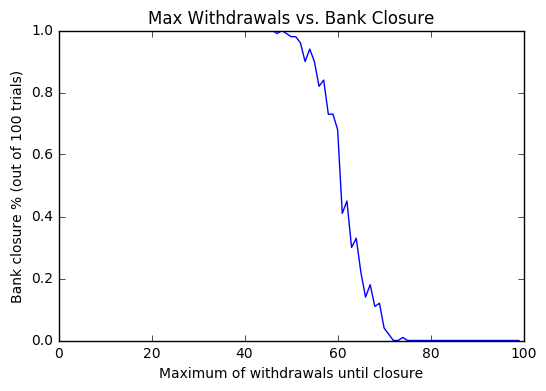

In [98]:
plt.plot(x,y)
plt.xlabel("Maximum of withdrawals until closure")
plt.ylabel("Bank closure % (out of 100 trials)")
plt.title("Max Withdrawals vs. Bank Closure")
plt.show()